In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

age : 나이

sex : 성별

cp : 가슴 통증 종류

treshbps : 안정시 혈압

chol : 콜레스테롤

fbs : 공복시 혈당 (1:120초과,2:120이하)

restecg : 안정시 심전도 0:normal, 1:ST-T파 이상, 2:좌심실 비대

thalach : 최대 심박수

exang : 운동 유발 협심증 1:yes, 0:no

oldpeak : ST depression induced by exercise relative to rest

slope : the slope of the peak exercise ST segment 1:upsloping, 2:flat, 3:downsloping

ca : 조영제에 착색된 혈관수

thal : 3:normal, 6:고정 결함, 7:가역적 결함

HeartDisease : 심장병 유무

In [3]:
column_name = ['age', 'sex', 'cp', 'treshbps', 'chol', 'fbs', 'restecg',
               'thalach', 'exang', 'oldpeak', 'slop', 'ca', 'thal',
               'HeartDisease']
raw_data = pd.read_excel('./datasets/heart-disease.xlsx',
                         header=None, names=column_name)
print(raw_data.head())

   age  sex  cp  treshbps chol  fbs  restecg  thalach  exang  oldpeak  slop  \
0   63    1   1       145  233    1        2      150      0      2.3     3   
1   67    1   4       160  286    0        0      108      1      1.5     2   
2   67    1   4       120    ?    0        2      129      1      2.6     2   
3   37    1   3       130  250    0        0      187      0      3.5     3   
4   41    0   2       130  204    0        2      172      0      1.4     1   

  ca thal  HeartDisease  
0  0    6             0  
1  3    3             1  
2  2    7             1  
3  0    3             0  
4  0    3             0  


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           303 non-null    int64  
 1   sex           303 non-null    int64  
 2   cp            303 non-null    int64  
 3   treshbps      303 non-null    int64  
 4   chol          303 non-null    object 
 5   fbs           303 non-null    int64  
 6   restecg       303 non-null    int64  
 7   thalach       303 non-null    int64  
 8   exang         303 non-null    int64  
 9   oldpeak       303 non-null    float64
 10  slop          303 non-null    int64  
 11  ca            303 non-null    object 
 12  thal          303 non-null    object 
 13  HeartDisease  303 non-null    int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 33.3+ KB


In [5]:
raw_data.describe()

,age,sex,cp,treshbps,fbs,restecg,thalach,exang,oldpeak,slop,HeartDisease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,0.148515,0.983498,149.607261,0.326733,1.039604,1.600660,0.458746
std,9.038662,0.467299,0.960126,17.599748,0.356198,0.994883,22.875003,0.469794,1.161075,0.616226,0.499120
min,29.000000,0.000000,1.000000,94.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,0.000000,0.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [6]:
clean_data = raw_data.replace('?', np.nan)
clean_data = clean_data.dropna()
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 301
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           296 non-null    int64  
 1   sex           296 non-null    int64  
 2   cp            296 non-null    int64  
 3   treshbps      296 non-null    int64  
 4   chol          296 non-null    float64
 5   fbs           296 non-null    int64  
 6   restecg       296 non-null    int64  
 7   thalach       296 non-null    int64  
 8   exang         296 non-null    int64  
 9   oldpeak       296 non-null    float64
 10  slop          296 non-null    int64  
 11  ca            296 non-null    float64
 12  thal          296 non-null    float64
 13  HeartDisease  296 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 34.7 KB


In [7]:
keep = column_name.pop()
print(keep)
print(column_name)

HeartDisease
['age', 'sex', 'cp', 'treshbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slop', 'ca', 'thal']


In [8]:
training_data = clean_data[column_name]
target = clean_data[[keep]]
print(training_data)
print(target)

     age  sex  cp  treshbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145  233.0    1        2      150      0      2.3   
1     67    1   4       160  286.0    0        0      108      1      1.5   
3     37    1   3       130  250.0    0        0      187      0      3.5   
4     41    0   2       130  204.0    0        2      172      0      1.4   
5     56    1   2       120  236.0    0        0      178      0      0.8   
..   ...  ...  ..       ...    ...  ...      ...      ...    ...      ...   
297   57    0   4       140  241.0    0        0      123      1      0.2   
298   45    1   1       110  264.0    0        0      132      0      1.2   
299   68    1   4       144  193.0    1        0      141      0      3.4   
300   57    1   4       130  131.0    0        0      115      1      1.2   
301   57    0   2       130  236.0    0        2      174      0      0.0   

     slop   ca  thal  
0       3  0.0   6.0  
1       2  3.0   3.0  
3     

In [9]:
print(target['HeartDisease'].sum())

136


In [10]:
print(target['HeartDisease'].mean())

0.4594594594594595


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(training_data)
scaled_data = pd.DataFrame(scaled_data, columns=column_name)
print(scaled_data)

          age       sex        cp  treshbps      chol       fbs   restecg  \
0    0.942285  0.692820 -2.236793  0.747441 -0.277228  2.425638  1.020526   
1    1.385714  0.692820  0.876486  1.592523  0.742265 -0.412263 -0.993312   
2   -1.939999  0.692820 -0.161274 -0.097641  0.049779 -0.412263 -0.993312   
3   -1.496571 -1.443376 -1.199033 -0.097641 -0.835064 -0.412263  1.020526   
4    0.166286  0.692820 -1.199033 -0.661029 -0.219521 -0.412263 -0.993312   
..        ...       ...       ...       ...       ...       ...       ...   
291  0.277143 -1.443376  0.876486  0.465747 -0.123343 -0.412263 -0.993312   
292 -1.053142  0.692820 -2.236793 -1.224417  0.319079 -0.412263 -0.993312   
293  1.496571  0.692820  0.876486  0.691102 -1.046657  2.425638 -0.993312   
294  0.277143  0.692820  0.876486 -0.097641 -2.239272 -0.412263 -0.993312   
295  0.277143 -1.443376 -1.199033 -0.097641 -0.219521 -0.412263  1.020526   

      thalach     exang   oldpeak      slop        ca      thal  
0    0.01

In [12]:
scaled_data.describe()

,age,sex,cp,treshbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal
count,2.960000e+02,2.960000e+02,2.960000e+02,2.960000e+02,2.960000e+02,2.960000e+02,2.960000e+02,2.960000e+02,2.960000e+02,2.960000e+02,2.960000e+02,2.960000e+02,2.960000e+02
mean,3.000603e-18,6.001206e-18,1.140229e-16,5.911187e-16,1.500301e-17,1.200241e-17,-2.400482e-17,6.001206e-16,-9.001808e-18,-1.200241e-17,4.200844e-17,-1.200241e-17,5.401085e-17
std,1.001693e+00,1.001693e+00,1.001693e+00,1.001693e+00,1.001693e+00,1.001693e+00,1.001693e+00,1.001693e+00,1.001693e+00,1.001693e+00,1.001693e+00,1.001693e+00,1.001693e+00
min,-2.826856e+00,-1.443376e+00,-2.236793e+00,-2.125838e+00,-2.335451e+00,-4.122626e-01,-9.933122e-01,-3.433796e+00,-6.928203e-01,-9.033993e-01,-9.734482e-01,-7.184209e-01,-8.908300e-01
25%,-7.205712e-01,-1.443376e+00,-1.612735e-01,-6.610293e-01,-7.004143e-01,-4.122626e-01,-9.933122e-01,-6.948401e-01,-6.928203e-01,-9.033993e-01,-9.734482e-01,-7.184209e-01,-8.908300e-01
50%,1.662857e-01,6.928203e-01,-1.612735e-01,-9.764125e-02,-8.487113e-02,-4.122626e-01,-4.898526e-01,1.453973e-01,-6.928203e-01,-2.153165e-01,6.453196e-01,-7.184209e-01,-8.908300e-01
75%,7.205712e-01,6.928203e-01,8.764865e-01,4.657468e-01,5.547167e-01,-4.122626e-01,1.020526e+00,7.128304e-01,1.443376e+00,4.727664e-01,6.453196e-01,3.501851e-01,1.177293e+00
max,2.494285e+00,6.928203e-01,8.764865e-01,3.846075e+00,6.089796e+00,2.425638e+00,1.020526e+00,2.284183e+00,1.443376e+00,4.429243e+00,2.264087e+00,2.487397e+00,1.177293e+00


In [13]:
scaled_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,296.0,3.000603e-18,1.001693,-2.826856,-0.720571,0.166286,0.720571,2.494285
sex,296.0,6.001206e-18,1.001693,-1.443376,-1.443376,0.692820,0.692820,0.692820
cp,296.0,1.140229e-16,1.001693,-2.236793,-0.161274,-0.161274,0.876486,0.876486
treshbps,296.0,5.911187e-16,1.001693,-2.125838,-0.661029,-0.097641,0.465747,3.846075
chol,296.0,1.500301e-17,1.001693,-2.335451,-0.700414,-0.084871,0.554717,6.089796
fbs,296.0,1.200241e-17,1.001693,-0.412263,-0.412263,-0.412263,-0.412263,2.425638
restecg,296.0,-2.400482e-17,1.001693,-0.993312,-0.993312,-0.489853,1.020526,1.020526
thalach,296.0,6.001206e-16,1.001693,-3.433796,-0.694840,0.145397,0.712830,2.284183
exang,296.0,-9.001808e-18,1.001693,-0.692820,-0.692820,-0.692820,1.443376,1.443376
oldpeak,296.0,-1.200241e-17,1.001693,-0.903399,-0.903399,-0.215316,0.472766,4.429243


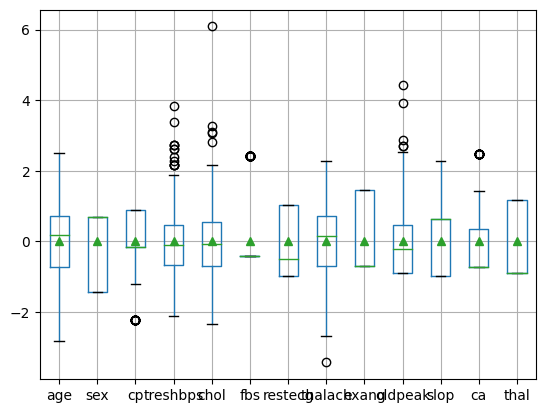

In [14]:
boxplot = scaled_data.boxplot(column=column_name, showmeans=True)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    scaled_data, target, test_size=0.30)
print('x_train shape', x_train.shape)
print('y_train shape', y_train.shape)
print('x_test shape', x_test.shape)
print('y_test shape', y_test.shape)

x_train shape (207, 13)
y_train shape (207, 1)
x_test shape (89, 13)
y_test shape (89, 1)


In [16]:
model = Sequential()
model.add(Dense(512, input_dim=13, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               7168      
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

In [17]:
model.compile(loss='mse', optimizer='adam', metrics=['binary_accuracy'])
fit_hist = model.fit(x_train, y_train, batch_size=50, epochs=20,
                     validation_split=0.2, verbose=1)

Epoch 1/20
4/4 [==============================] - 2s 160ms/step - loss: 0.2234 - binary_accuracy: 0.6909 - val_loss: 0.1794 - val_binary_accuracy: 0.7857
Epoch 2/20
4/4 [==============================] - 0s 33ms/step - loss: 0.1579 - binary_accuracy: 0.8182 - val_loss: 0.1428 - val_binary_accuracy: 0.8095
Epoch 3/20
4/4 [==============================] - 0s 27ms/step - loss: 0.1284 - binary_accuracy: 0.8242 - val_loss: 0.1352 - val_binary_accuracy: 0.8333
Epoch 4/20
4/4 [==============================] - 0s 28ms/step - loss: 0.1054 - binary_accuracy: 0.8606 - val_loss: 0.1331 - val_binary_accuracy: 0.8333
Epoch 5/20
4/4 [==============================] - 0s 34ms/step - loss: 0.1002 - binary_accuracy: 0.8545 - val_loss: 0.1295 - val_binary_accuracy: 0.8333
Epoch 6/20
4/4 [==============================] - 0s 22ms/step - loss: 0.0970 - binary_accuracy: 0.8788 - val_loss: 0.1262 - val_binary_accuracy: 0.8333
Epoch 7/20
4/4 [==============================] - 0s 24ms/step - loss: 0.0936 - b

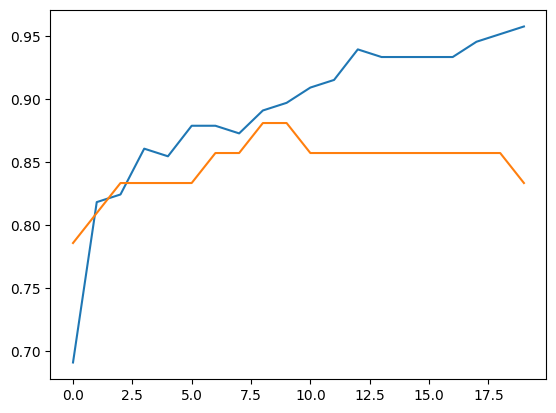

In [18]:
plt.plot(fit_hist.history['binary_accuracy'])
plt.plot(fit_hist.history['val_binary_accuracy'])
plt.show()

In [19]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Keras DNN model loss :', score[0])
print('Keras DNN model accuracy :', score[1])

Keras DNN model loss : 0.14629186689853668
Keras DNN model accuracy : 0.7977527976036072
